# Kaggle Competition:  Iceberg or Ship

# resnext50 architecture 

## increase epochs


---
## Import libraries

In [1]:
!ls -l

total 2656
-rw-rw-r-- 1 ubuntu ubuntu 625023 Jan 14 18:47 1_getdata.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 245619 Jan 14 18:36 2_model_resnet34.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  13445 Jan 14 18:36 3_model_resnext50.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  14220 Jan 13 21:14 4_model_nasnet.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  64965 Jan 14 19:40 4_resnext_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 147078 Jan 14 19:57 5_resnet18_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 138629 Jan 14 19:52 6_resnext50_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 178957 Jan 14 23:41 7_resnext50_more_epoch.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 179449 Jan 14 21:28 7_resnext50_sz_100.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 178748 Jan 14 23:41 8_resnext50_more_epoch_sz300.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 137540 Jan 14 18:36 baseline.ipynb
-rw-rw-r-- 1 ubuntu ubuntu    536 Jan 14 18:36 helper.py
-rw-rw-r-- 1 ubuntu ubuntu 767392 Jan 14 18:36 other_groverpr.ipynb
drwxrwxr-x 2 ubuntu ubuntu   4096 Jan 14 18:51 __pycache__
-rw-rw-r-- 1 ubuntu ubuntu  

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
import shutil
from IPython.display import FileLink, FileLinks

from sklearn.model_selection import train_test_split
import helper

In [5]:
#PATH = "/home/nidhin/data/iceberg/"
PATH = os.path.expanduser("~/data/iceberg/")

In [6]:
!ls -l {PATH}

total 1973260
drwxrwxr-x 2 ubuntu ubuntu       4096 Jan  9 00:38 models
-rw-rw-r-- 1 ubuntu ubuntu     117951 Oct 23 17:27 sample_submission.csv
-rw-rw-r-- 1 ubuntu ubuntu      38566 Jan  7 20:36 sample_submission.csv.7z
drwxrwxr-x 2 ubuntu ubuntu     274432 Jan 14 18:44 test
-rw-rw-r-- 1 ubuntu ubuntu 1521771850 Oct 23 17:27 test.json
-rw-rw-r-- 1 ubuntu ubuntu  257127394 Jan  7 20:36 test.json.7z
drwxrwxr-x 8 ubuntu ubuntu       4096 Jan 14 23:14 tmp
drwxrwxr-x 4 ubuntu ubuntu       4096 Jan 14 18:43 train
-rw-rw-r-- 1 ubuntu ubuntu  196313674 Oct 23 17:23 train.json
-rw-rw-r-- 1 ubuntu ubuntu   44932785 Jan  7 20:36 train.json.7z
drwxrwxr-x 4 ubuntu ubuntu       4096 Jan 14 18:43 valid


In [7]:
np.random.seed(0)

## Set Architecture

In [8]:
arch=resnext50
sz=200
bs=32
lr = 0.005

In [9]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.00)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

data = get_data(sz, bs)
data = data.resize(int(sz*1.5), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [10]:
#tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test',)

learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

100%|██████████| 264/264 [02:36<00:00,  1.68it/s]


### Learning Rate Finder

In [11]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 71%|███████   | 29/41 [00:00<00:00, 37.60it/s, loss=5.74] 


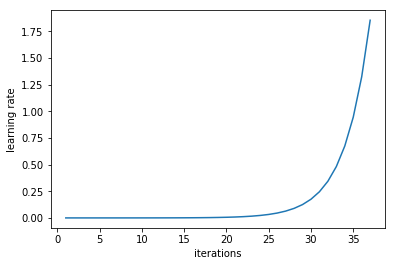

In [12]:
learn.sched.plot_lr()

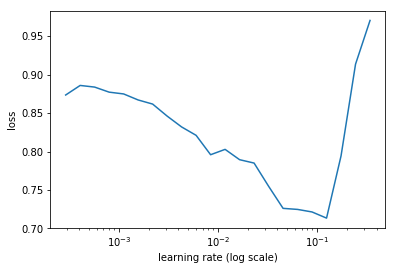

In [13]:
learn.sched.plot() 

In [14]:
learn.fit(lr, 10)
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

[0.      0.575   0.36835 0.84091]                          
[1.      0.50283 0.36706 0.82386]                          
[2.      0.44092 0.33442 0.83523]                          
[3.      0.40784 0.32021 0.83239]                          
[4.      0.36265 0.31447 0.86079]                          
[5.      0.38851 0.3316  0.83807]                          
[6.      0.34834 0.32499 0.84659]                          
[7.      0.32054 0.32331 0.84091]                          
[8.      0.31901 0.31272 0.84659]                          
[9.      0.30314 0.31837 0.84943]                          



### Stochastic Gradient Descent with Restart

In [15]:
#learn.fit(lr, 4, cycle_len=2)
learn.fit(lr, 6, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=63), HTML(value='')))

[0.      0.42701 0.30452 0.84943]                          
[1.      0.43297 0.28763 0.88636]                          
[2.      0.43043 0.28029 0.88636]                          
[3.      0.42741 0.30146 0.85227]                          
[4.      0.43036 0.30558 0.85796]                          
[5.      0.41627 0.30468 0.85227]                          
[6.      0.4239  0.3017  0.85511]                          
[7.      0.40127 0.32226 0.85511]                          
[8.      0.40466 0.32664 0.83523]                          
[9.      0.41538 0.28473 0.86079]                          
[10.       0.4154   0.31276  0.86079]                      
[11.       0.42301  0.29041  0.86079]                      
[12.       0.38929  0.28799  0.875  ]                      
[13.       0.40402  0.29968  0.87216]                      
[14.       0.39523  0.28423  0.88352]                      
[15.       0.38529  0.33157  0.86648]                      
[16.       0.40798  0.31204  0.84375]   

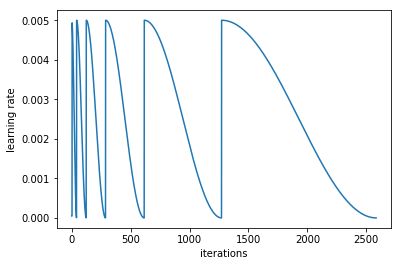

In [16]:
learn.sched.plot_lr()

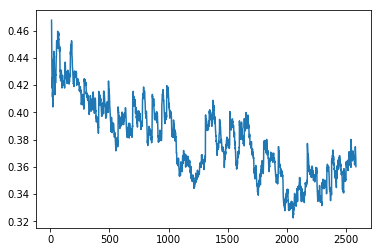

In [17]:
learn.sched.plot_loss()

In [18]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.29436033869896056, 0.8753894080996885)

In [19]:
# lr/10

In [20]:
# lr/9

In [21]:
# lr/3

In [22]:
# lr/4

### Unfreeze Layers

In [23]:
# unfreeze layers
learn.unfreeze()
#lrs = np.array([lr/15,lr/12,lr/9])
lrs = np.array([lr/9,lr/3,lr/1])

#wd = 0.025
#wds=[wd/100, wd/10, wd]
#wds=[0.0025,0.025,0.25]


### Run Learner Again

In [24]:
learn.fit(lrs, 6, cycle_len=1, cycle_mult=2)
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2,use_wd_sched=True,wds=wds)

HBox(children=(IntProgress(value=0, description='Epoch', max=63), HTML(value='')))

[0.      0.51119 0.39686 0.80114]                          
[1.      0.41433 0.31581 0.86079]                          
[2.      0.34278 0.27269 0.88352]                          
[3.      0.33222 0.24953 0.89204]                          
[4.      0.31777 0.25916 0.87784]                          
[5.      0.28662 0.25582 0.87216]                          
[6.      0.24937 0.28932 0.875  ]                          
[7.      0.24128 0.24823 0.88636]                          
[8.      0.26963 0.23062 0.90057]                          
[9.      0.24302 0.34074 0.87216]                          
[10.       0.20515  0.25601  0.87784]                      
[11.       0.18742  0.2276   0.90341]                      
[12.       0.20606  0.23921  0.90909]                      
[13.       0.16345  0.24911  0.90057]                      
[14.       0.15015  0.25653  0.89204]                      
[15.       0.1619   0.24322  0.89773]                      
[16.       0.16295  0.34569  0.85227]   

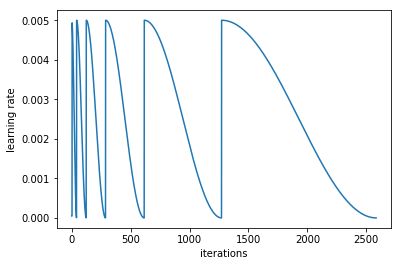

In [25]:
learn.sched.plot_lr()

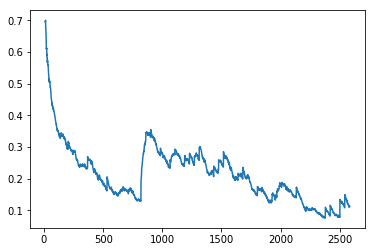

In [26]:
learn.sched.plot_loss()

In [27]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.27450479332743705, 0.8940809968847352)

In [28]:
learn.save('resnext50_sz75_zm12')

In [29]:
learn.load('resnext50_sz75_zm12')

### Run Learner again

In [30]:
learn.fit(lrs, 6, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=63), HTML(value='')))

[0.      0.12268 0.33517 0.88921]                          
[1.      0.15165 0.31365 0.875  ]                          
[2.      0.12309 0.34163 0.88068]                          
[3.      0.18311 0.27565 0.90341]                          
[4.      0.13618 0.30569 0.87784]                          
[5.      0.11171 0.34182 0.87784]                          
[6.      0.08782 0.35781 0.89204]                           
[7.      0.08607 0.30347 0.90625]                           
[8.      0.1726  0.50979 0.83807]                           
[9.      0.14677 0.3044  0.90625]                          
[10.       0.14314  0.39492  0.87784]                      
[11.       0.1219   0.46043  0.86648]                      
[12.       0.1117   0.43205  0.86648]                       
[13.       0.11275  0.35311  0.88636]                       
[14.       0.09713  0.37705  0.86932]                       
[15.       0.13306  0.58516  0.83523]                      
[16.       0.12111  0.36078  0.866

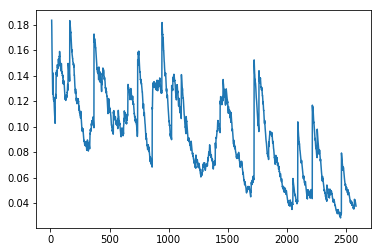

In [31]:
learn.sched.plot_loss()

In [32]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.33657381838428085, 0.881619937694704)

### Run Learner again

In [33]:
learn.fit(lrs, 6, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=63), HTML(value='')))

[0.      0.18378 0.48322 0.875  ]                           
[1.      0.10417 0.42388 0.86364]                           
[2.      0.11562 0.33858 0.89489]                           
[3.      0.07672 0.30463 0.90057]                           
[4.      0.06673 0.3811  0.88068]                           
[5.      0.12975 0.37492 0.89204]                           
[6.      0.08586 0.34695 0.88921]                           
[7.      0.06178 0.39774 0.89773]                           
[8.      0.08045 0.40698 0.89204]                           
[9.      0.11349 0.47287 0.86648]                          
[10.       0.09922  0.34917  0.90625]                       
[11.       0.09501  0.36274  0.89489]                       
[12.       0.07781  0.39213  0.88921]                       
[13.       0.08187  0.34004  0.89489]                       
[14.       0.07801  0.37382  0.875  ]                       
[15.       0.09595  0.42967  0.88068]                       
[16.       0.12496  0.419

KeyboardInterrupt: 

In [ ]:
learn.sched.plot_loss()

## Log Loss | Accuracy (final model here)

In [ ]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

## Save predictions

In [ ]:
# test_df = pd.read_json(PATH+"/test.json")
# helper.make_test_file(log_preds,test_df,model_name='resnext50_sz75_zm15_bs32_comp_band',
#                       classes=data.classes,
#                       submission_folder =f'{PATH}sub'
#                      )